In [64]:
import pandas as pd
df = pd.read_csv('D:\\IIM\\Thesis\\Chap 2\\YelpZipIncFeat.csv')
#df = pd.read_csv('D:\\IIM\\Thesis\\Chap 2\\amazonbook5foldFeat.csv')
df

,user_id,prod_id,date,reviews,rating,label,burst,PosSent,NegSent,CompSent,...,Uppercase,Lowercase,subjectivity,#ofwordswostp,le_d,ld,Entropy,Ext,singleton,ratio_LCAPS
0,69511,829,2014-08-06,It's been a while since I've been to Pho Dang ...,5,1,0,0.17,0.00,0.92,...,10,254,0.716667,70,100.0,12.652407,-0.000000,1,1,0.039370
1,33058,829,2011-04-17,It tasted alright but I probably won't go back...,2,1,1,0.03,0.12,-0.72,...,6,223,0.362857,56,100.0,14.012766,0.321888,0,0,0.026906
2,33058,2831,2011-04-17,My eyes swell shut when I eat msg so I'm const...,4,1,1,0.09,0.00,0.77,...,12,322,0.495370,72,100.0,13.907901,0.366516,0,0,0.037267
3,33058,3162,2011-04-17,This place makes me look forward to laundry da...,4,1,1,0.07,0.00,0.59,...,6,359,0.478571,81,100.0,13.734403,0.366516,0,0,0.016713
4,51957,829,2014-09-07,"Yelp says it all. ""Meh I've experienced better...",2,1,1,0.00,0.08,-0.30,...,7,153,0.557143,38,100.0,14.777778,0.366204,0,0,0.045752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44335,265140,4009,2012-07-21,Recently i ordered a meatball grinder with cur...,1,0,1,0.03,0.15,-0.89,...,10,301,0.330000,75,100.0,13.527679,-0.000000,0,1,0.033223
44336,265219,5038,2013-07-18,All I can say is HORRIBLE & DISAPPOINTING! I ...,1,0,1,0.06,0.08,-0.72,...,96,796,0.633761,223,100.0,14.097764,-0.000000,0,1,0.120603
44337,265218,5038,2013-09-09,I'm done for good with Italian Peoples Bakery....,1,0,1,0.05,0.10,-0.89,...,31,859,0.558442,211,100.0,13.384361,-0.000000,0,1,0.036088
44338,185045,5038,2013-09-27,Terrible customer service and highly disappoin...,1,0,1,0.08,0.14,-0.93,...,39,702,0.501935,169,100.0,13.913622,-0.000000,0,1,0.055556


In [65]:
df.drop(['Uavg#word_x'], axis = 1,inplace=True)
df.rename(columns={'Uavg#word_y':'Uavg#word'}, inplace=True)
df.columns,df.shape

(Index(['user_id', 'prod_id', 'date', 'reviews', 'rating', 'label', 'burst',
        'PosSent', 'NegSent', 'CompSent', 'avg_PSent', 'med_PSent', 'fSent',
        'incentivised', 'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts',
        '#ofwords', 'Uavg#word', 'Pavg#word', 'day_Urating', 'day_Prating',
        'count_punct', 'Exclaim', '#ofCharacter', 'Uppercase', 'Lowercase',
        'subjectivity', '#ofwordswostp', 'le_d', 'ld', 'Entropy', 'Ext',
        'singleton', 'ratio_LCAPS'],
       dtype='object'),
 (44340, 36))

In [66]:
feata = ['PosSent', 'NegSent', 'CompSent', 'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'Pavg#word', 'day_Urating', 'day_Prating','#ofCharacter', 'Uppercase', 'Lowercase',
       'subjectivity', '#ofwordswostp', 'le_d', 'ld', 'ratio_LCAPS']
dftransform = df[feata]
featb = ['rating', 'count_punct', 'Exclaim',  'Entropy', 'Ext','singleton','incentivised']
dftemp = df[featb]

In [67]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
dfPowTran = pt.fit_transform(dftransform)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [68]:
dfPowTran = pd.DataFrame(dfPowTran,columns =dftransform.columns )
dfPowTran

,PosSent,NegSent,CompSent,avg_Urating,avg_Prating,UCcounts,PCcounts,#ofwords,Uavg#word,Pavg#word,day_Urating,day_Prating,#ofCharacter,Uppercase,Lowercase,subjectivity,#ofwordswostp,le_d,ld,ratio_LCAPS
0,0.479650,-1.354500,1.054640,1.335049,-1.349895,-0.611563,-0.928449,-0.156856,-0.205904,-0.012687,0.000000,-0.248207,-0.254416,-0.056379,-0.282715,1.091579,-0.156856,0.0,-0.876683,0.307161
1,-1.138190,0.657116,-1.101322,0.138077,-1.349895,1.753585,-0.928449,-0.390543,-0.211253,-0.012687,5.449642,-0.248207,-0.413666,-0.540118,-0.416431,-1.232897,-0.390543,0.0,-0.031692,-0.368841
2,-0.317648,-1.354500,0.858078,0.138077,-0.265244,1.753585,-1.155196,-0.126474,-0.211253,0.413981,5.449642,-0.248207,-0.059938,0.127764,-0.027719,-0.430119,-0.126474,0.0,-0.096068,0.204964
3,-0.565952,-1.354500,0.622072,0.138077,0.470647,1.753585,-0.477549,0.002743,-0.211253,-2.005207,5.449642,-0.248207,0.060558,-0.540118,0.094269,-0.536364,0.002743,0.0,-0.202848,-1.068008
4,-1.645991,0.151444,-0.547609,-0.098497,-1.349895,1.440424,-0.928449,-0.768278,0.206878,-0.012687,5.449642,-0.248207,-0.750359,-0.399372,-0.780075,-0.028224,-0.768278,0.0,0.434324,0.591571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44335,-1.138190,0.962111,-1.325685,-1.490621,-0.916783,-0.611563,-1.944305,-0.082091,-0.127847,-0.028768,0.000000,-0.248207,-0.114419,-0.056379,-0.101735,-1.419477,-0.082091,0.0,-0.330523,-0.004493
44336,-0.699023,0.151444,-1.101322,-1.490621,-2.361918,-0.611563,-1.672052,1.271206,1.306821,2.483931,0.000000,-0.248207,1.252305,2.589566,1.093607,0.494829,1.271206,0.0,0.020398,2.208700
44337,-0.838499,0.420150,-1.325685,-1.490621,-2.361918,-0.611563,-1.672052,1.194095,1.224040,2.483931,0.000000,-0.248207,1.175354,1.172957,1.199799,-0.019585,1.194095,0.0,-0.419328,0.145722
44338,-0.438936,0.866563,-1.378494,-1.490621,-2.361918,-0.611563,-1.672052,0.894228,0.903254,2.483931,0.000000,-0.248207,0.932553,1.446071,0.922674,-0.388250,0.894228,0.0,-0.092553,0.962276


In [219]:
dfPowTran.day_Urating.value_counts()

-0.219349    27562
 5.154710     1026
Name: day_Urating, dtype: int64

In [69]:
import numpy as np
dflogln  = pd.DataFrame()
dflog10 = pd.DataFrame()
for col in dftransform.columns:
    dflogln[col] = np.log(dftransform[col])
    dflog10[col] = np.log10(dftransform[col])
dflog10

C:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PosSent,NegSent,CompSent,avg_Urating,avg_Prating,UCcounts,PCcounts,#ofwords,Uavg#word,Pavg#word,day_Urating,day_Prating,#ofCharacter,Uppercase,Lowercase,subjectivity,#ofwordswostp,le_d,ld,ratio_LCAPS
0,-0.769551,-inf,-0.036212,0.698970,0.327359,0.000000,0.903090,1.845098,1.845098,2.014940,0.000000,0.0,2.537819,1.000000,2.404834,-0.144683,1.845098,2.0,1.102173,-1.404834
1,-1.522879,-0.920819,NaN,0.522879,0.327359,0.477121,0.903090,1.748188,1.843025,2.014940,0.477121,0.0,2.471292,0.778151,2.348305,-0.440264,1.748188,2.0,1.146524,-1.570154
2,-1.045757,-inf,-0.113509,0.522879,0.477121,0.477121,0.778151,1.857332,1.843025,2.069421,0.477121,0.0,2.615950,1.079181,2.507856,-0.305070,1.857332,2.0,1.143262,-1.428675
3,-1.154902,-inf,-0.229148,0.522879,0.544068,0.477121,1.146128,1.908485,1.843025,1.720750,0.477121,0.0,2.662758,0.778151,2.555094,-0.320053,1.908485,2.0,1.137810,-1.776943
4,-inf,-1.096910,NaN,0.477121,0.327359,0.301030,0.903090,1.579784,1.997823,2.014940,0.301030,0.0,2.322219,0.845098,2.184691,-0.254033,1.579784,2.0,1.169609,-1.339593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44335,-1.522879,-0.823909,NaN,0.000000,0.397940,0.000000,0.301030,1.875061,1.875061,2.012837,0.000000,0.0,2.594393,1.000000,2.478566,-0.481486,1.875061,2.0,1.131223,-1.478566
44336,-1.221849,-1.096910,NaN,0.000000,0.000000,0.000000,0.477121,2.348305,2.348305,2.303196,0.000000,0.0,3.071514,1.982271,2.900913,-0.198075,2.348305,2.0,1.149150,-0.918642
44337,-1.301030,-1.000000,NaN,0.000000,0.000000,0.000000,0.477121,2.324282,2.324282,2.303196,0.000000,0.0,3.047664,1.491362,2.933993,-0.253022,2.324282,2.0,1.126598,-1.442631
44338,-1.096910,-0.853872,NaN,0.000000,0.000000,0.000000,0.477121,2.227887,2.227887,2.303196,0.000000,0.0,2.970347,1.591065,2.846337,-0.299353,2.227887,2.0,1.143440,-1.255273


In [70]:
dfsqrt = pd.DataFrame()
dfcbrt = pd.DataFrame()
for col in dftransform.columns:
    dfsqrt[col] = (dftransform[col]**(1/2))
    dfcbrt[col] = dftransform[col]**(1/3)

In [71]:
dfPowTran.replace([np.inf], 0,inplace=True)
dfPowTran.replace([np.nan], 0,inplace=True)
dflogln.replace([np.inf], 0,inplace=True)
dflogln.replace([np.nan], 0,inplace=True)
dflog10.replace([np.inf], 0,inplace=True)
dflog10.replace([np.nan], 0,inplace=True)
dflog10.replace([-np.inf],0, inplace = True)
dfPowTran.replace([-np.inf],0, inplace = True)
dflogln.replace([-np.inf],0, inplace = True)
dfsqrt.replace([np.inf], 0,inplace=True)
dfsqrt.replace([np.nan], 0,inplace=True)
dfcbrt.replace([np.inf], 0,inplace=True)
dfcbrt.replace([np.nan], 0,inplace=True)

In [ ]:
dftemp.columns

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dftemp['Exclaim'] = le.fit_transform(dftemp['Exclaim'])
dftemp

C:\Users\SYEDAB~1\AppData\Local\Temp/ipykernel_9108/1139488115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp['Exclaim'] = le.fit_transform(dftemp['Exclaim'])


,rating,count_punct,Exclaim,Entropy,Ext,singleton,incentivised
0,5,10,1,-0.000000,1,1,0
1,2,12,1,0.321888,0,0,1
2,4,8,0,0.366516,0,0,0
3,4,15,1,0.366516,0,0,0
4,2,13,0,0.366204,0,0,1
...,...,...,...,...,...,...,...
44335,1,7,1,-0.000000,0,1,1
44336,1,43,1,-0.000000,0,1,1
44337,1,16,0,-0.000000,0,1,1
44338,1,25,1,-0.000000,0,1,1


In [73]:
dfPowTran = pd.concat([dfPowTran,dftemp], axis = 1)
dflogln = pd.concat([dflogln,dftemp], axis = 1)
dflog10 = pd.concat([dflog10,dftemp], axis = 1)
dfsqrt = pd.concat([dfsqrt,dftemp], axis = 1)
dfcbrt = pd.concat([dfcbrt,dftemp], axis = 1)

In [74]:
dfPowTran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44340 entries, 0 to 44339
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PosSent        44340 non-null  float64
 1   NegSent        44340 non-null  float64
 2   CompSent       44340 non-null  float64
 3   avg_Urating    44340 non-null  float64
 4   avg_Prating    44340 non-null  float64
 5   UCcounts       44340 non-null  float64
 6   PCcounts       44340 non-null  float64
 7   #ofwords       44340 non-null  float64
 8   Uavg#word      44340 non-null  float64
 9   Pavg#word      44340 non-null  float64
 10  day_Urating    44340 non-null  float64
 11  day_Prating    44340 non-null  float64
 12  #ofCharacter   44340 non-null  float64
 13  Uppercase      44340 non-null  float64
 14  Lowercase      44340 non-null  float64
 15  subjectivity   44340 non-null  float64
 16  #ofwordswostp  44340 non-null  float64
 17  le_d           44340 non-null  float64
 18  ld    

In [75]:
df = df[['rating',  'PosSent', 'NegSent', 'CompSent', 'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'Pavg#word', 'day_Urating', 'day_Prating',
       'count_punct', 'Exclaim', '#ofCharacter', 'Uppercase', 'Lowercase',
       'subjectivity', '#ofwordswostp', 'le_d', 'ld', 'Entropy', 'Ext',
       'singleton', 'ratio_LCAPS','incentivised']]

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xgb = XGBClassifier(random_state = 44, nthread = 4)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
gnb = GaussianNB()
rf = RandomForestClassifier(random_state = 44,n_jobs = -1)
lr = LogisticRegression(random_state = 44,n_jobs = -1)
#lr_model = lr.fit_transform(X_train,X_test)
#lr__trainpred  = lr_model.predict(X_train)

def get_score(y_true,y_pred):
    acc = accuracy_score(y_true,y_pred)
    ap = average_precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    auc = roc_auc_score(y_true,y_pred)
    return round(acc*100,2),round(ap*100,2),round(f1*100,2),round(auc*100,2)

labels = ['XGBoost','KNN Classifier', 'Naive Bayes', 'Random Forest', 'Logistic Regression', ]
scores = pd.DataFrame(columns = ['Accuracy','Avg_Precision', 'f1','AUC'])
a = []
b = []
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    a.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    b.append(result_test)
    
    
scores = pd.DataFrame(a, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(b, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.44,98.41,98.46,98.48,96.52,96.13,96.60,96.61
KNN Classifier,78.67,71.70,78.43,78.69,56.45,52.02,55.81,56.46
Naive Bayes,93.25,90.66,93.28,93.26,93.07,90.54,93.14,93.08
Random Forest,100.00,100.00,100.00,100.00,96.58,96.27,96.66,96.67
Logistic Regression,93.53,91.40,93.59,93.55,93.66,91.68,93.76,93.69


In [78]:
c = []
d = []
X_train, X_test, y_train, y_test = train_test_split(dfPowTran.iloc[:,:-1], dfPowTran.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    c.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    d.append(result_test)
    
    
scores = pd.DataFrame(c, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(d, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.55,98.51,98.57,98.58,96.59,96.20,96.67,96.67
KNN Classifier,96.06,95.45,96.13,96.13,93.69,92.55,93.87,93.81
Naive Bayes,93.90,92.08,93.97,93.93,93.60,91.78,93.72,93.64
Random Forest,100.00,100.00,100.00,100.00,96.57,96.25,96.66,96.67
Logistic Regression,96.24,95.87,96.32,96.34,96.27,96.04,96.37,96.39


In [79]:
e = []
f = []
X_train, X_test, y_train, y_test = train_test_split(dflogln.iloc[:,:-1], dflogln.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    e.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    f.append(result_test)
    
    
scores = pd.DataFrame(e, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(f, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.31,98.31,98.33,98.35,96.48,96.08,96.57,96.57
KNN Classifier,93.86,92.09,93.94,93.89,89.51,86.38,89.69,89.54
Naive Bayes,84.39,76.60,83.85,84.53,83.96,75.89,83.42,84.14
Random Forest,100.00,100.00,100.00,100.00,96.45,96.02,96.54,96.53
Logistic Regression,87.98,81.74,87.67,88.06,88.20,81.92,87.93,88.31


In [80]:
g = []
h = []
X_train, X_test, y_train, y_test = train_test_split(dflog10.iloc[:,:-1], dflog10.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    g.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    h.append(result_test)
    
    
scores = pd.DataFrame(g, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(h, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.25,98.24,98.27,98.29,96.47,96.05,96.56,96.56
KNN Classifier,92.06,89.45,92.14,92.09,85.38,80.93,85.55,85.39
Naive Bayes,84.39,76.60,83.85,84.53,83.96,75.89,83.42,84.14
Random Forest,100.00,100.00,100.00,100.00,96.45,96.02,96.54,96.53
Logistic Regression,87.46,80.87,87.10,87.57,87.71,80.96,87.36,87.85


In [81]:
i = []
j = []
X_train, X_test, y_train, y_test = train_test_split(dfsqrt.iloc[:,:-1], dfsqrt.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    i.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    j.append(result_test)
    
    
scores = pd.DataFrame(i, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(j, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.23,98.22,98.26,98.27,96.49,96.13,96.57,96.58
KNN Classifier,90.54,86.55,90.51,90.54,81.66,75.13,81.53,81.67
Naive Bayes,95.75,95.02,95.83,95.82,95.82,95.20,95.92,95.91
Random Forest,100.00,100.00,100.00,100.00,96.55,96.25,96.64,96.65
Logistic Regression,96.26,95.95,96.34,96.36,96.27,96.10,96.38,96.40


In [82]:
k = []
l = []
X_train, X_test, y_train, y_test = train_test_split(dfcbrt.iloc[:,:-1], dfcbrt.iloc[:,-1], test_size=0.30, random_state=42)
for clf, label in zip([xgb,knn,gnb,rf,lr], labels):
    model = clf.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    result = get_score(train_pred,y_train)
    k.append(result)
    test_pred = model.predict(X_test)
    result_test = get_score(test_pred,y_test)
    l.append(result_test)
    
    
scores = pd.DataFrame(k, columns = ['Accuracy','Avg_Precision', 'f1','AUC'], index = [labels])
test_score = pd.DataFrame(l, columns = ['Test_Accuracy','Test_Avg_Precision', 'Test_f1','Test_AUC'], index = [labels])
cons_result = pd.concat([scores,test_score],axis = 1)
cons_result

,Accuracy,Avg_Precision,f1,AUC,Test_Accuracy,Test_Avg_Precision,Test_f1,Test_AUC
XGBoost,98.23,98.22,98.26,98.27,96.49,96.13,96.57,96.58
KNN Classifier,94.84,93.50,94.91,94.88,90.62,87.99,90.80,90.67
Naive Bayes,95.93,95.19,96.00,96.00,95.96,95.32,96.06,96.04
Random Forest,100.00,100.00,100.00,100.00,96.55,96.25,96.64,96.65
Logistic Regression,96.39,95.99,96.46,96.48,96.41,96.14,96.51,96.52


In [111]:
dfsqrt.isnull().values.any()

False

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

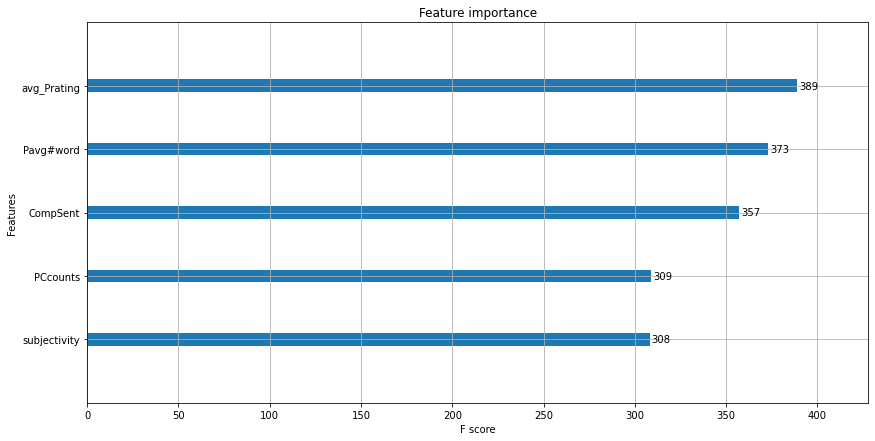

In [77]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 7)
xgb.feature_importances_
plot_importance(xgb,max_num_features = 5,importance_type='weight')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44340 entries, 0 to 44339
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        44340 non-null  int64  
 1   prod_id        44340 non-null  int64  
 2   date           44340 non-null  object 
 3   reviews        44340 non-null  object 
 4   rating         44340 non-null  int64  
 5   label          44340 non-null  int64  
 6   burst          44340 non-null  int64  
 7   PosSent        44340 non-null  float64
 8   NegSent        44340 non-null  float64
 9   CompSent       44340 non-null  float64
 10  avg_PSent      44340 non-null  float64
 11  med_PSent      44340 non-null  float64
 12  fSent          44340 non-null  float64
 13  incentivised   44340 non-null  int64  
 14  avg_Urating    44340 non-null  float64
 15  avg_Prating    44340 non-null  float64
 16  UCcounts       44340 non-null  int64  
 17  PCcounts       44340 non-null  int64  
 18  #ofwor

In [117]:
 df.loc[(df['CompSent']<0) & (df['rating']>=4)].to_csv('deceptive rating score.csv',index = False) 

In [234]:
import pandas as pd
df = pd.read_csv('D:\\IIM\\Thesis\\Chap 2\\YelpNYCFeat.csv')
df

,user_id,prod_id,rating,date,reviews,label,burst,PosSent,NegSent,CompSent,...,count_punct,Exclaim,subjectivity,#ofwordswostp,le_d,ld,Entropy,Ext,singleton,ratio_LCAPS
0,78744,379,5,2012-06-16,**UPDATE** We've finally dined here not once -...,1,1,0.13,0.04,0.99,...,58,1,0.527262,405,100.0,13.110430,-0.000000,1,1,0.031491
1,4242,379,5,2013-09-23,There is noStarbucks in sunset park so I gave ...,1,1,0.23,0.00,0.92,...,3,0,0.500000,65,100.0,14.196137,0.346574,1,1,0.020080
2,34840,379,4,2012-03-31,"What a crazy, ridiculous experience Artichoke ...",0,0,0.17,0.07,0.94,...,23,1,0.729563,122,100.0,15.144938,-0.000000,0,1,0.044487
3,78849,379,4,2009-03-10,**UPDATE** We've finally dined here not once -...,1,1,0.13,0.04,0.99,...,58,1,0.527262,405,100.0,13.110430,-0.000000,0,1,0.031491
4,3046,379,5,2010-01-17,"The ambience is great, it's low-lit but very c...",1,1,0.36,0.00,0.95,...,11,0,0.694444,34,100.0,16.117509,0.326548,1,1,0.019737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28583,114111,737,4,2014-07-25,I'm on a sangria kick. I don't think I want to...,1,1,0.18,0.08,0.97,...,39,1,0.426466,169,100.0,15.234012,-0.000000,0,1,0.039216
28584,131048,846,4,2013-04-30,I can not believe the good reviews I read in y...,1,1,0.08,0.12,-0.55,...,12,0,0.700000,82,100.0,13.966905,-0.000000,0,1,0.031949
28585,131191,787,5,2015-01-04,I can not believe the good reviews I read in y...,1,1,0.08,0.12,-0.55,...,12,0,0.700000,82,100.0,13.966905,-0.000000,1,1,0.031949
28586,93706,817,5,2014-04-10,Overrated. Tried their crab and pork dumplin...,1,1,0.00,0.22,-0.45,...,5,0,0.650000,17,100.0,15.743092,-0.000000,1,1,0.039474


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


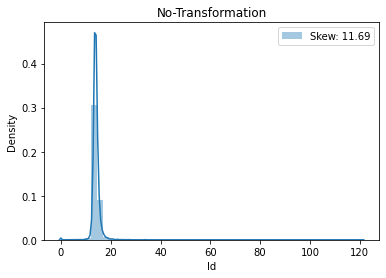

In [196]:
import seaborn as sn
import matplotlib.pyplot as plt
data  = 'ld' 
res = sn.distplot(df[data],kde = True,label = "Skew: "+str(round(df[data].skew(),2)))
plt.title("No-Transformation")
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


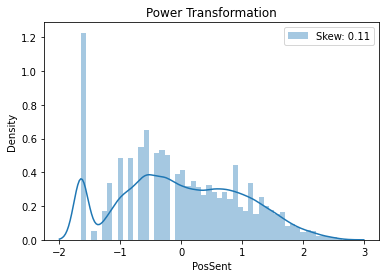

In [151]:
res = sn.distplot(dfPowTran[data],kde = True,label = "Skew: "+str(round(dfPowTran[data].skew(),2)))
plt.title("Power Transformation")
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


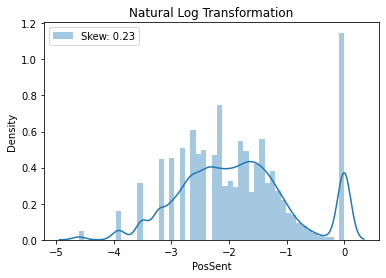

In [153]:
res = sn.distplot(dflogln[data],kde = True,label = "Skew: "+str(round(dflogln[data].skew(),2)))
plt.title("Natural Log Transformation")
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


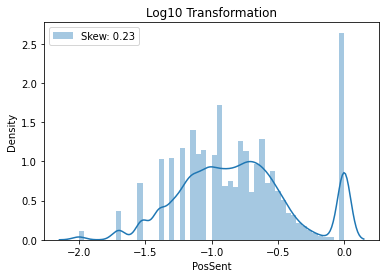

In [154]:
res = sn.distplot(dflog10[data],kde = True,label = "Skew: "+str(round(dflog10[data].skew(),2)))
plt.title("Log10 Transformation")
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


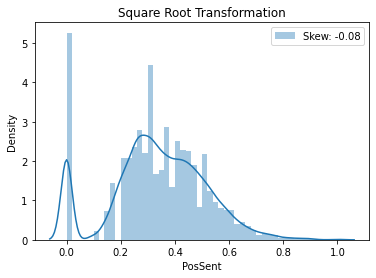

In [155]:
res = sn.distplot(dfsqrt[data],kde = True,label = "Skew: "+str(round(dfsqrt[data].skew(),2)))
plt.title("Square Root Transformation")
plt.legend()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


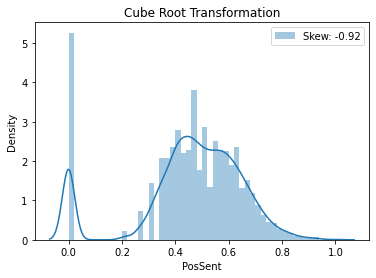

In [156]:
res = sn.distplot(dfcbrt[data],kde = True,label = "Skew: "+str(round(dfcbrt[data].skew(),2)))
plt.title("Cube Root Transformation")
plt.legend()
plt.show()

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfstd = sc.fit_transform(df[feata])

In [163]:
dfstd = pd.DataFrame(dfstd, columns = df[feata].columns)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


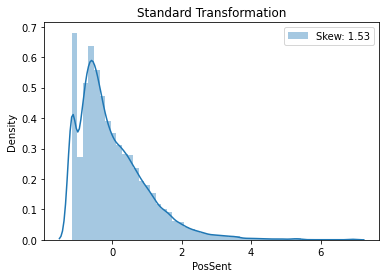

In [164]:
res = sn.distplot(dfstd[data],kde = True,label = "Skew: "+str(round(dfstd[data].skew(),2)))
plt.title("Standard Transformation")
plt.legend()
plt.show()

In [235]:
from scipy import stats as st
a = df.loc[df['incentivised']==1,'ld']
b = df.loc[df['incentivised']==0,'ld']
st.ttest_ind(a = a,b = b, equal_var = True)

Ttest_indResult(statistic=21.871118683005623, pvalue=3.570945759305609e-105)

In [239]:
from scipy import stats as st
a = df.loc[df['incentivised']==1,'subjectivity']
b = df.loc[df['incentivised']==0,'subjectivity']
st.ttest_ind(a = a,b = b, equal_var = True)

Ttest_indResult(statistic=73.12885054795791, pvalue=0.0)

In [172]:
round(p_val,5)

0.0

In [166]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [179]:
import researchpy as rp

In [240]:
summary, results  = rp.ttest(group1=a, group1_name= "Incentivised",
         group2= b, group2_name= "Non-Incentivised")

In [241]:
pd.DataFrame(summary)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Incentivised,14294.0,0.658215,0.073763,0.000617,0.657006,0.659424
1,Non-Incentivised,14294.0,0.580582,0.103286,0.000864,0.578889,0.582275
2,combined,28588.0,0.619399,0.097780,0.000578,0.618265,0.620532


In [242]:
pd.DataFrame(results)

,Independent t-test,results
0,Difference (Incentivised - Non-Incentivised) =,0.0776
1,Degrees of freedom =,28586.0000
2,t =,73.1289
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.8650
7,Hedge's g =,0.8650
8,Glass's delta =,1.0525
9,Pearson's r =,0.3970


In [250]:
stats,p = st.levene(a,b,center= 'mean')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.873, p=0.000


In [249]:
sampling_difference = a.values - \
                      b.values

stats, p = st.shapiro(sampling_difference)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.873, p=0.000


C:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


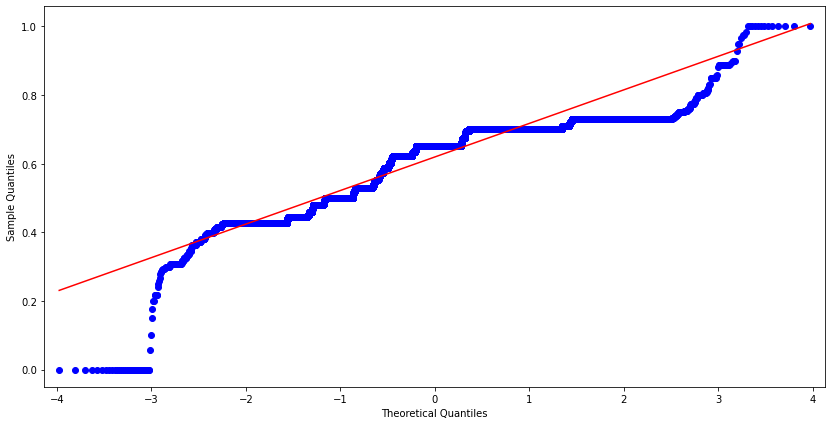

In [246]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['subjectivity'], line='s')
pyplot.show()

C:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


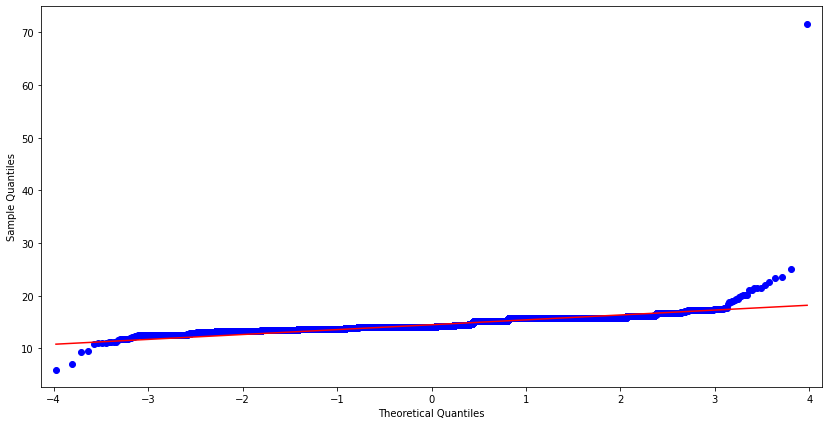

In [247]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['ld'], line='s')
pyplot.show()

In [248]:
from scipy.stats import shapiro
# seed the random number generator

# generate univariate observations
data = df['subjectivity']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.873, p=0.000
Sample does not look Gaussian (reject H0)


C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
